# Paradoxical cross-decoding
This script demonstrates paradoxical cross-decoding, the occurrence of significantly above-chance cross-task decoding, even when though the training task does not afford significantly above-chance within-task decoding.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from CrossDecoding import CrossClassifier, toy_data, permutation_test

# display plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Text(0.5,1,'task 1 measured values')

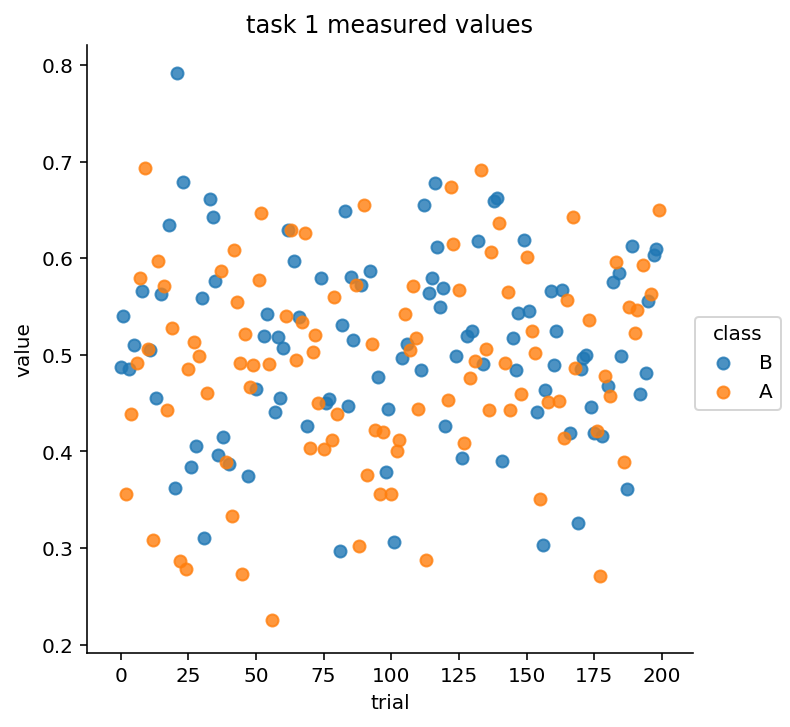

In [27]:
# task 1 data, narrow margin
class_A = ('A', .49, .1)
class_B = ('B', .51, .1)
task_1 = toy_data([class_A, class_B], n_per_class=100)
sns.lmplot('trial', 'value', data=task_1, fit_reg=False, hue='class')
plt.title('task 1 measured values')

Text(0.5,1,'task 2 measured values')

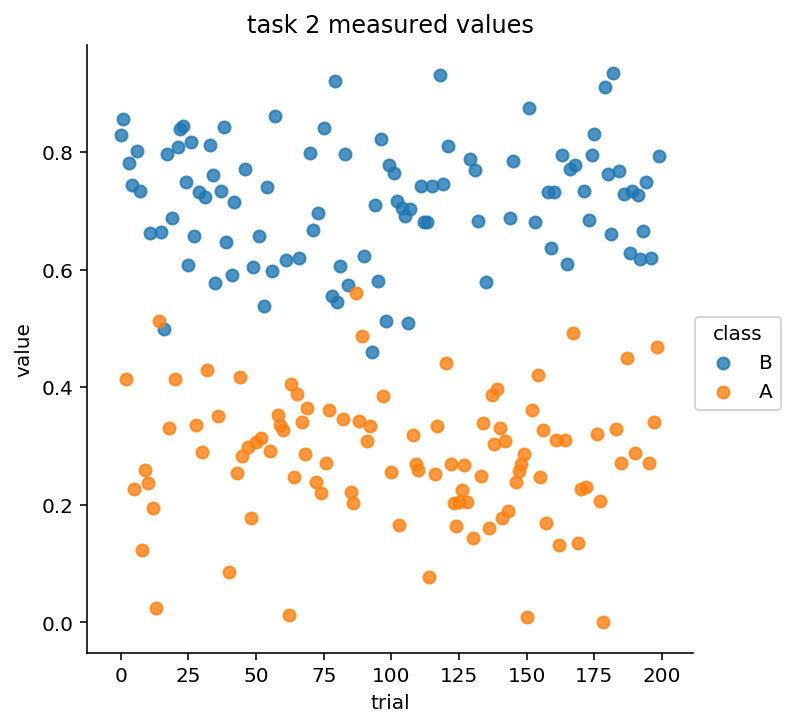

In [28]:
# task 2 data, wide margin
class_A = ('A', .3, .1)
class_B = ('B', .7, .1)
task_2 = toy_data([class_A, class_B], n_per_class=100)
sns.lmplot('trial', 'value', data=task_2, fit_reg=False, hue='class')
plt.title('task 2 measured values')

In [4]:
# permutation test decoding task 1
clf = LinearSVC()
n_permutations = 1000
score, permutation_scores, pvalue = permutation_test(clf=clf,
                                                     X=task_1['value'].values.reshape(-1, 1),
                                                     y=task_1['class'],
                                                     cv=10,
                                                     n_permutations=n_permutations)
print('\nTask 1 decoding accuracy: %0.2f (p = %0.3f)' % (float(score), pvalue))
print('Mean accuracy over %i permutations: %0.2f' % (n_permutations, float(np.mean(permutation_scores))))

# permutation test decoding task 2
clf = LinearSVC()
n_permutations = 1000
score, permutation_scores, pvalue = permutation_test(clf=clf,
                                                     X=task_2['value'].values.reshape(-1, 1),
                                                     y=task_2['class'],
                                                     cv=10,
                                                     n_permutations=n_permutations)
print('\nTask 2 decoding accuracy: %0.2f (p = %0.3f)' % (float(score), pvalue))
print('Mean accuracy over %i permutations: %0.2f' % (n_permutations, float(np.mean(permutation_scores))))


Task 1 decoding accuracy: 0.51 (p = 0.464)
Mean accuracy over 1000 permutations: 0.50

Task 2 decoding accuracy: 0.98 (p = 0.001)
Mean accuracy over 1000 permutations: 0.50


In [5]:
# permutation test cross-decoding from task 1 to task 2
clf = LinearSVC()
cross_clf = CrossClassifier(clf, task_2['value'].values.reshape(-1, 1), task_2['class'])
n_permutations = 1000
score, permutation_scores, pvalue = permutation_test(clf=cross_clf,
                                                     X=task_1['value'].values.reshape(-1, 1),
                                                     y=task_1['class'],
                                                     cv=10,
                                                     n_permutations=n_permutations)
print('\nTask 1 to task 2 cross-decoding accuracy: %0.2f (p = %0.3f)' % (float(score), pvalue))
print('Mean accuracy over %i permutations: %0.2f' % (n_permutations, float(np.mean(permutation_scores))))

# permutation test cross-decoding from task 2 to task 1
clf = LinearSVC()
cross_clf = CrossClassifier(clf, task_1['value'].values.reshape(-1, 1), task_1['class'])
n_permutations = 1000
score, permutation_scores, pvalue = permutation_test(clf=cross_clf,
                                                     X=task_2['value'].values.reshape(-1, 1),
                                                     y=task_2['class'],
                                                     cv=10,
                                                     n_permutations=n_permutations)
print('\nTask 2 to task 1 cross-decoding accuracy: %0.2f (p = %0.3f)' % (float(score), pvalue))
print('Mean accuracy over %i permutations: %0.2f' % (n_permutations, float(np.mean(permutation_scores))))


Task 1 to task 2 cross-decoding accuracy: 0.97 (p = 0.082)
Mean accuracy over 1000 permutations: 0.52

Task 2 to task 1 cross-decoding accuracy: 0.50 (p = 0.508)
Mean accuracy over 1000 permutations: 0.50
